In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

! mkdir ~/.kaggle


import shutil

# Source file path
source = '/content/drive/MyDrive/kaggle API/kaggle.json'

# Destination file path
destination = '/root/.kaggle/kaggle.json'

# Copy the file
shutil.copyfile(source, destination)

print("kaggle.json has been copied to ~/.kaggle/")


!chmod 600 ~/.kaggle/kaggle.json

kaggle.json has been copied to ~/.kaggle/


In [ ]:
!kaggle datasets list -s "new-plant-diseases-dataset"

ref                                                               title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
vipoooool/new-plant-diseases-dataset                              New Plant Diseases Dataset                     3GB  2018-11-18 07:09:16          83035       1095  0.75             
alinedobrovsky/plant-disease-classification-merged-dataset        Plant Disease Classification Merged Dataset   17GB  2023-01-03 15:11:19           4861         56  0.6875           
piantic/plantpathology-apple-dataset                              PlantPathology Apple Dataset                 813MB  2020-04-24 13:45:22           1577         40  0.5882353        
antaresnyc/metagenomics                                           Metagenomics       

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.68G/2.70G [00:27<00:00, 224MB/s]
100% 2.70G/2.70G [00:28<00:00, 103MB/s]


In [ ]:
!unzip /content/new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ReLU, BatchNormalization
from tensorflow.keras.preprocessing import image
import os
import pandas as pd


In [ ]:
#COUNT

# Define a function to count the number of files (assumed to be images for this context) for each subdirectory in a given directory.
# The function returns a DataFrame with these counts, indexed by a specified set name (e.g., 'train' or 'test').
def count_files_in_subdirs(directory, set_name):
    # Initialize an empty dictionary to hold the count of files for each subdirectory.
    counts = {}

    # Iterate over each item in the given directory.
    for item in os.listdir(directory):
        # Construct the full path to the item.
        item_path = os.path.join(directory, item)

        # Check if the item is a directory.
        if os.path.isdir(item_path):
            # Count the number of files in the subdirectory and add it to the dictionary.
            counts[item] = len(os.listdir(item_path))

    # Convert the counts dictionary to a DataFrame for easy viewing and analysis.
    # The index of the DataFrame is set to the provided set name.
    df = pd.DataFrame(counts, index=[set_name])
    return df

# Paths to the training and testing directories.
train_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Count the files in the subdirectories of the training directory and print the result.
train_count = count_files_in_subdirs(train_dir, 'train')
print(train_count)

# Count the files in the subdirectories of the testing directory and print the result.
test_count = count_files_in_subdirs(test_dir, 'test')
print(test_count)


       Tomato___Spider_mites Two-spotted_spider_mite  \
train                                           1741   

       Pepper,_bell___Bacterial_spot  Tomato___Septoria_leaf_spot  \
train                           1913                         1745   

       Soybean___healthy  Tomato___Late_blight  Raspberry___healthy  \
train               2022                  1851                 1781   

       Potato___healthy  Blueberry___healthy  Corn_(maize)___Common_rust_  \
train              1824                 1816                         1907   

       Grape___Black_rot  ...  Apple___Apple_scab  Strawberry___healthy  \
train               1888  ...                2016                  1824   

       Apple___Black_rot  Tomato___Early_blight  Potato___Early_blight  \
train               1987                   1920                   1939   

       Grape___Leaf_blight_(Isariopsis_Leaf_Spot)  Pepper,_bell___healthy  \
train                                        1722                    1988

<Axes: >

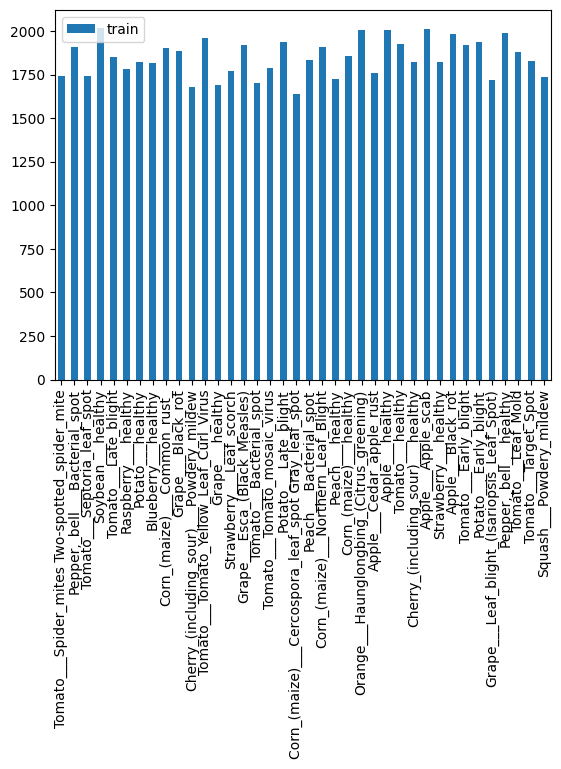

In [ ]:
train_count.transpose().plot(kind='bar')

<Axes: >

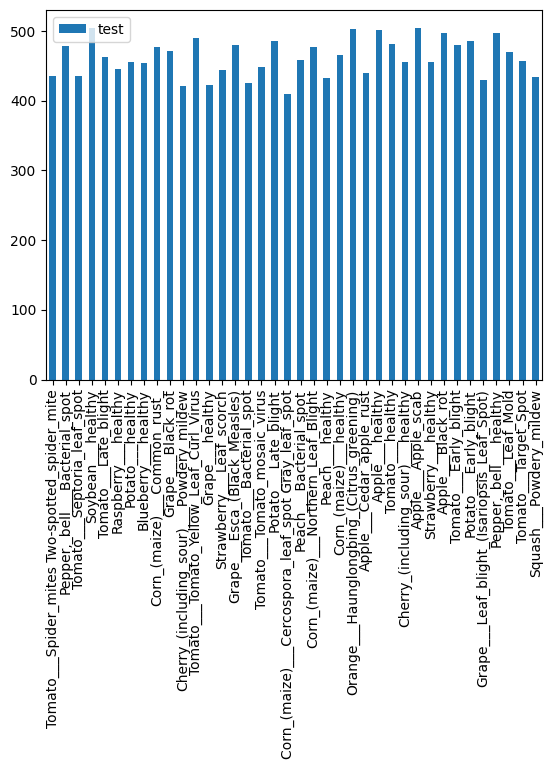

In [ ]:
test_count.transpose().plot(kind='bar')

**Resnet 50**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'


train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest'           # Strategy used for filling in newly created pixels
                                )


test_datagen = ImageDataGenerator(
                                  rescale=1/255
                              )


train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(224, 224),
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    batch_size=32
                                                )


test_generator = test_datagen.flow_from_directory(
                                                  test_dir,
                                                  target_size=(224, 224),
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  batch_size=32
                                              )

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


AttributeError: 'DirectoryIterator' object has no attribute 'class_names'

In [ ]:


from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adamax

# Extract class labels for all instances in the training dataset
classes = np.array(train_generator.classes)

# Calculate class weights to handle imbalances in the training data
# 'balanced' mode automatically adjusts weights inversely proportional to class frequencies
class_weights = compute_class_weight(
    class_weight='balanced',  # Strategy to balance classes
    classes=np.unique(classes),  # Unique class labels
    y=classes  # Class labels for each instance in the training dataset
)

# Create a dictionary mapping class indices to their calculated weights
class_weights_dict = dict(enumerate(class_weights))

# Output the class weights dictionary
print("Class Weights Dictionary:", class_weights_dict)

Class Weights Dictionary: {0: 0.917593462823726, 1: 0.9309856170370566, 2: 1.0510616028708133, 3: 0.9212492136716293, 4: 1.0186500115928587, 5: 1.0991493886230728, 6: 1.013071424453796, 7: 1.1265946535034297, 8: 0.9700411227334198, 9: 0.9695327154363897, 10: 0.9950879080433737, 11: 0.9798031891168599, 12: 0.9634731359649122, 13: 1.074255761354606, 14: 1.0933028493218864, 15: 0.9203325477873789, 16: 1.006457247580322, 17: 1.0705257066276803, 18: 0.9669986518832365, 19: 0.9305173144127925, 20: 0.9540321923943432, 21: 0.9540321923943432, 22: 1.0141822483841183, 23: 1.038668400366441, 24: 0.9148706335571868, 25: 1.065592408440456, 26: 1.0427668664332759, 27: 1.0141822483841183, 28: 1.0868792133094192, 29: 0.9634731359649122, 30: 0.9993886661548523, 31: 0.9829268974774875, 32: 1.0600965163625395, 33: 1.0625321200761813, 34: 1.012516924495146, 35: 0.9433291285327035, 36: 1.0334460452807999, 37: 0.9604716620210964}


In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adamax



input_shape = (224, 224, 3)

base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=input_shape)

model = Sequential([
                    base_model,
                    BatchNormalization(),
                    GlobalAveragePooling2D(),
                    Dense(512, activation='relu'),
                    Dropout(0.1),
                    Dense(256, activation='relu'),
                    Dropout(0.1),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(38, activation='softmax')
                  ])

optimizer = Adamax(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

94668760/94668760 [==============================] - 6s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 batch_normalization (Batch  (None, 7, 7, 2048)        8192      
 Normalization)                                                  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                         

In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,CSVLogger



# File path for the model checkpoint
cnn_path = '/content/drive/MyDrive'
name = 'ResNet50_Transfer_Learning.keras'
chk_path = os.path.join(cnn_path, name)

# Callback to save the model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

# Callback for early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=6,
                          verbose=1,
                          restore_best_weights=True)

# Callback to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)

# Callback to log training data to a CSV file
csv_logger = CSVLogger(os.path.join(cnn_path,'training.log'))

# Aggregating all callbacks into a list
callbacks = [checkpoint, earlystop, csv_logger]  # Adjusted as per your use-case

train_steps_per_epoch = train_generator.samples // train_generator.batch_size + 1
# validation_steps_epoch = validation_generator.samples // validation_generator.batch_size + 1
test_steps_epoch = test_generator.samples // test_generator.batch_size + 1

In [ ]:
train_history = model.fit(
                          train_generator,
                          steps_per_epoch=300,
                          epochs=10,
                          validation_data=test_generator,
                          validation_steps=100,
                          class_weight=class_weights_dict,
                          callbacks = callbacks
                        )

Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 2.9166 - accuracy: 0.2937
Epoch 1: val_loss improved from inf to 1.31323, saving model to /content/drive/MyDrive/ResNet50_Transfer_Learning.keras
300/300 [==============================] - 207s 570ms/step - loss: 2.9166 - accuracy: 0.2937 - val_loss: 1.3132 - val_accuracy: 0.7169
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 1.0862 - accuracy: 0.7468
Epoch 2: val_loss improved from 1.31323 to 0.39495, saving model to /content/drive/MyDrive/ResNet50_Transfer_Learning.keras
300/300 [==============================] - 175s 581ms/step - loss: 1.0862 - accuracy: 0.7468 - val_loss: 0.3949 - val_accuracy: 0.8981
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 0.5331 - accuracy: 0.8587
Epoch 3: val_loss improved from 0.39495 to 0.17848, saving model to /content/drive/MyDrive/ResNet50_Transfer_Learning.keras
300/300 [==============================] - 177s 589ms/step - loss: 0.5331 

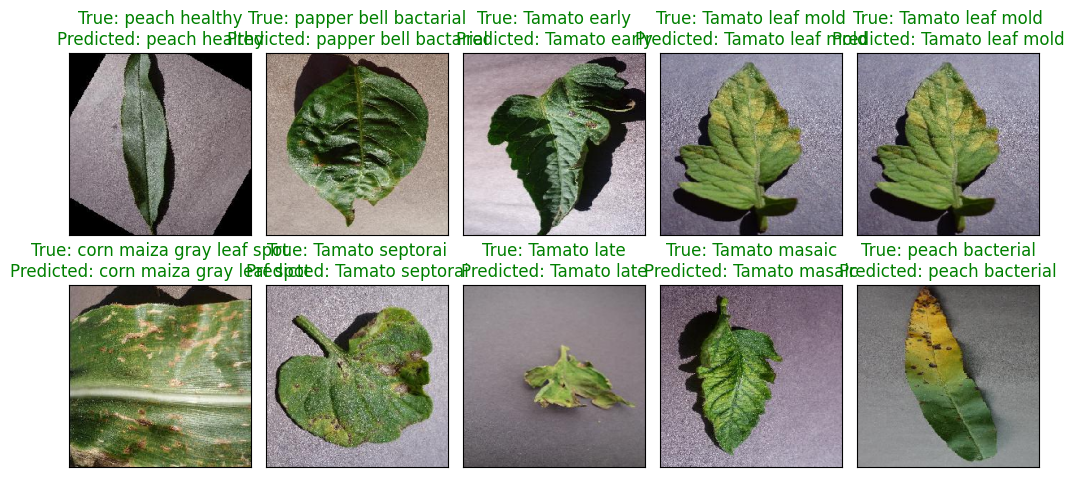

In [ ]:



# Assuming test_generator and model are already defined
batch_size = test_generator.batch_size

# Selecting a random batch from the test generator
Random_batch = np.random.randint(0, len(test_generator) - 1)

# Selecting random image indices from the batch
Random_Img_Index = np.random.randint(0, batch_size, 20)

# Setting up the plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Fetching the random image and its label
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]], axis=0)

    # Making a prediction using the model
    Model_Prediction = np.argmax(model.predict(tf.expand_dims(Random_Img, axis=0), verbose=0), axis=1)[0]

    # Displaying the image
    ax.imshow(Random_Img.squeeze(), cmap='gray')  # Assuming the images are grayscale
    # Setting the title with true and predicted labels, colored based on correctness
    color = "green" if class_names[Random_Img_Label] == class_names[Model_Prediction] else "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 24ms/step


In [ ]:
class_names = ['Apple scab', 'apple black rot', 'apple cedar', 'apple healthy', 'blue bary healthy', 'cherry powdery', 'cherry Haaealthy','corn maiza gray leaf spot',
           'corn maiza  common rust','corn leaf blight','corn healthy','grape black rot','graps esca','grapes leaf blight','grapes healthy',
           'orange','peach bacterial','peach healthy','papper bell bactarial','papper bell healthy','patato early','patato late','patato Healthy','raspberry H',
           'syabean healthy','soyabean powdery','stabery leaf scorch','stawbery haealthy','Tamato Bacterail','Tamato early','Tamato late','Tamato leaf mold','Tamato septorai',
           'Tamato spider','tamoato target','Tamato yellow leaf','Tamato masaic','Tamato healthy']

In [ ]:
def load_and_prep_image(file_path, img_height, img_width):
    img = image.load_img(file_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    return img_array / 255.0

In [ ]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np


test_image_path = "/content/th (1).jpeg"
img = load_and_prep_image(test_image_path, 224, 224)

predictions = model.predict(img)
index=np.argmax(predictions)
print(index)

predicted_class = class_names[np.argmax(predictions)]
print(f'Predicted class: {predicted_class, predictions[0][np.argmax(predictions)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
21
Predicted class: ('patato late', 0.43650186)


###TFLITE MODEL TESTED

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the TensorFlow Lite model
tflite_model_path = '/content/drive/MyDrive/muz.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get details of input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare the image
def load_and_prep_image(file_path, img_height, img_width):
    img = image.load_img(file_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    return img_array / 255.0

# Image path and dimensions
test_image_path = "/content/abc.jpeg"
img = load_and_prep_image(test_image_path, 224, 224)

# Run inference
interpreter.set_tensor(input_details[0]['index'], img)
interpreter.invoke()
predictions = interpreter.get_tensor(output_details[0]['index'])

# Get the class with the highest probability
index = np.argmax(predictions)
predicted_class = class_names[index]

print(f'Predicted class: {predicted_class}')
print(f'Prediction probability: {predictions[0][index]}')


Predicted class: papper bell bactarial
Prediction probability: 0.9998792409896851
